In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from linefit import linefit

/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:50: RuntimeWarning: invalid value encountered in scalar divide
  m = SXY / SXX
/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:52: RuntimeWarning: invalid value encountered in scalar divide
  R2 = SXY * SXY / (SXX * SYY)
/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:50: RuntimeWarning: divide by zero encountered in scalar divide
  m = SXY / SXX
/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  R2 = SXY * SXY / (SXX * SYY)


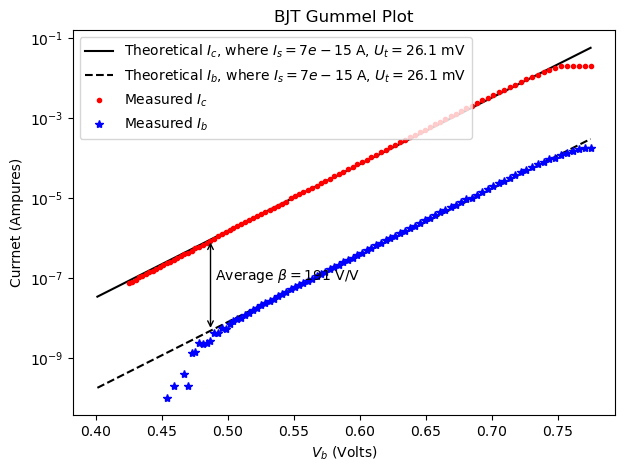

In [2]:
exp1 = pd.read_csv("lab3-exp1.csv")
exp1["current_collector"] = np.abs(exp1["current_emitter"]) - np.abs(exp1["current_base"])

exp1 = exp1[exp1["voltage_base"] < .775]

v_exp1 = exp1["voltage_base"].to_numpy()[::-1]
i_c_exp1 = exp1["current_collector"].to_numpy()[::-1]
i_b_exp1 = exp1["current_base"].to_numpy()[::-1]

first, last, mmax, bmax, Nmax = linefit(np.log(i_c_exp1), v_exp1)

u_t = mmax
i_s = 7e-15

v_b_theory = np.logspace(np.log10(.3), np.log10(np.max(exp1["voltage_base"])))
i_c_theory = i_s * np.exp(v_b_theory/u_t)

beta_est = (v_exp1 > .5) & (v_exp1 < .7)
i_c_beta_est = i_c_exp1[beta_est]
i_b_beta_est = i_b_exp1[beta_est]
beta = np.average(i_c_beta_est / i_b_beta_est)
beta = int(beta)

i_b_theory = i_c_theory / beta


plt.figure(figsize=(7,5))
plt.semilogy()

inds = v_b_theory > .4

plt.plot(v_b_theory[inds], i_c_theory[inds], "-k", label=f"Theoretical $I_c$, where $I_s={i_s}$ A, $U_t={u_t*1000:0.3}$ mV")
plt.plot(v_b_theory[inds], i_b_theory[inds], "--k", label=f"Theoretical $I_b$, where $I_s={i_s}$ A, $U_t={u_t*1000:0.3}$ mV")
plt.plot(exp1["voltage_base"][::2], exp1["current_collector"][::2], "r.", label="Measured $I_c$")
plt.plot(exp1["voltage_base"][::2], exp1["current_base"][::2], "b*", label="Measured $I_b$")

annot_ind = len(i_c_theory) // 2
plt.annotate(
    "",
    xy=(v_b_theory[annot_ind], i_b_theory[annot_ind]),
    xytext=(v_b_theory[annot_ind], beta*i_b_theory[annot_ind]),
    arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"),
    ha="center",
    va="center"
)
plt.annotate(
    f" Average $\\beta={beta}$ V/V",
    xy=(v_b_theory[annot_ind], beta/10*i_b_theory[annot_ind])
)

plt.title("BJT Gummel Plot")
plt.xlabel("$V_b$ (Volts)")
plt.ylabel("Currnet (Ampures)")

plt.legend(loc="upper left")
plt.savefig("exp1-gummel.pdf")
plt.show()
plt.close()

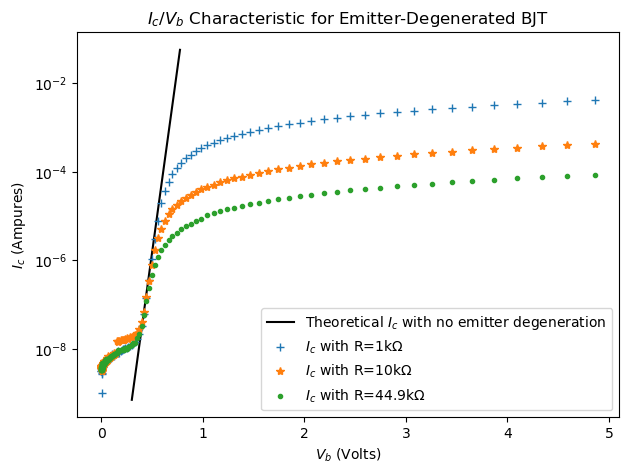

In [3]:
# exp2_100 = pd.read_csv("lab3-exp2-100.csv")
exp2_1k = pd.read_csv("lab3-exp2-1k.csv")
exp2_10k = pd.read_csv("lab3-exp2-10k.csv")
exp2_49_9k = pd.read_csv("lab3-exp2-44_9k.csv")

exp2_data = {
    # "100"  : exp2_100,
    "1k"   : exp2_1k,
    "10k"  : exp2_10k,
    "44.9k": exp2_49_9k,
}

exp2_res_map = {
    "1k": 1000,
    "10k": 10000,
    "44.9k": 44900
}

for r, df in exp2_data.items():
    df["current_collector"] = np.abs(df["current_emitter"]) - np.abs(df["current_base"])


plt.figure(figsize=(7, 5))
plt.semilogy()

plt.plot(v_b_theory, i_c_theory, "k", label="Theoretical $I_c$ with no emitter degeneration")

markers = [".", "*", "+"]

for r, df in exp2_data.items():
    mark = markers.pop()

    current_collector = np.abs(df["current_emitter"]) - df["current_base"]
    plt.plot(df["voltage_base"][::2], current_collector[::2], mark, label=f"$I_c$ with R={r}$\Omega$")


plt.legend()
plt.xlabel("$V_b$ (Volts)")
plt.ylabel("$I_c$ (Ampures)")
plt.title("$I_c/V_b$ Characteristic for Emitter-Degenerated BJT")

plt.savefig("exp2-ic_vb_characteristic.pdf")
plt.show()
plt.close()

/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:52: RuntimeWarning: invalid value encountered in scalar divide
  R2 = SXY * SXY / (SXX * SYY)
/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  R2 = SXY * SXY / (SXX * SYY)


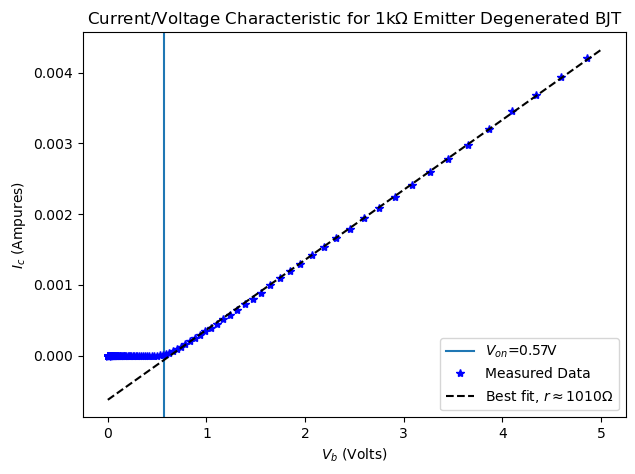

/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:52: RuntimeWarning: invalid value encountered in scalar divide
  R2 = SXY * SXY / (SXX * SYY)
/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  R2 = SXY * SXY / (SXX * SYY)


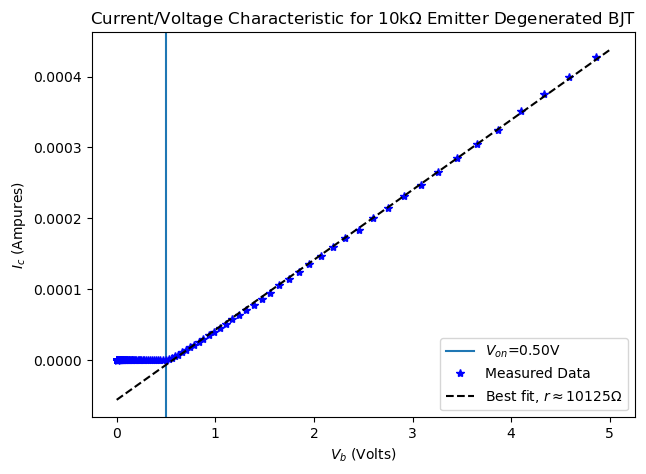

/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  R2 = SXY * SXY / (SXX * SYY)
/home/violet/Documents/Programs/IntroMicroelectronicCircuitswithLaboratory/Lab3/linefit.py:52: RuntimeWarning: invalid value encountered in scalar divide
  R2 = SXY * SXY / (SXX * SYY)


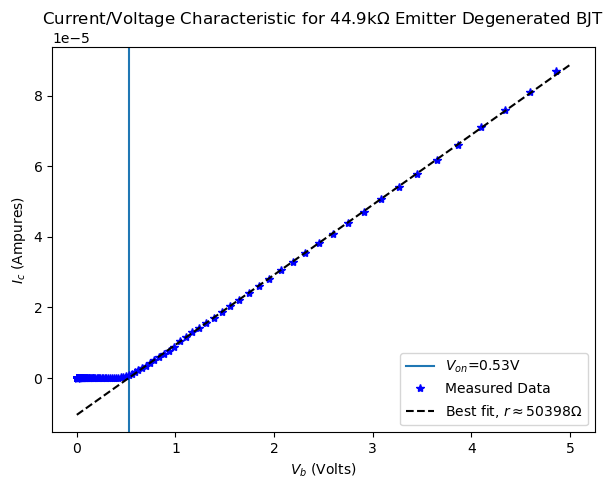

In [4]:
v_on_map = {}

for r, df in exp2_data.items():
    v_b = df["voltage_base"].to_numpy()[::-1]
    i_c = df["current_collector"].to_numpy()[::-1]
    
    first, last, mmax, bmax, Nmax = linefit(v_b, i_c, .03)
    if r == "10k":
        first, last, mmax, bmax, Nmax = linefit(v_b, i_c, .05)

    v_on_map[r] = v_b[first]
    
    v_b_fit = np.linspace(0, 5)
    i_c_fit = v_b_fit * mmax + bmax

    

    plt.figure(figsize=(7, 5))

    plt.axvline(v_on_map[r], label="$V_{on}$" + f"={v_on_map[r]:0.2f}V")

    plt.plot(v_b[::2], i_c[::2], "b*", label="Measured Data")
    plt.plot(v_b_fit, i_c_fit, "k--", label=f"Best fit, $r\\approx{int(1/mmax)}\Omega$")


    plt.xlabel("$V_b$ (Volts)")
    plt.ylabel("$I_c$ (Ampures)")
    plt.title(f"Current/Voltage Characteristic for {r}$\Omega$ Emitter Degenerated BJT")

    plt.legend()
    plt.savefig(f"exp2-ic_vb_characteristic_{r}.pdf")
    plt.show()
    plt.close()


/tmp/ipykernel_7067/2355198905.py:20: RuntimeWarning: divide by zero encountered in divide
  R_b = np.diff(v_b) / np.diff(i_b)


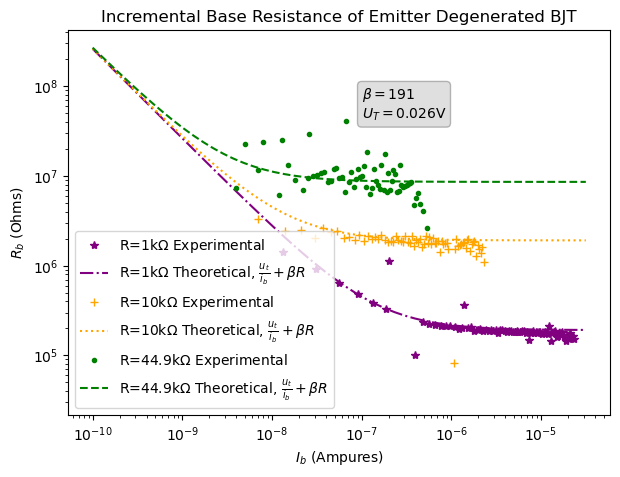

In [5]:
plt.figure(figsize=(7,5))
plt.loglog()

cmap = ["purple", "orange", "green"]
i = 0

marks = [".", "+", "*"]
lines = ["--", ":", "-."]

for r, df in exp2_data.items():
    mark = marks.pop()
    line = lines.pop()

    i_b = np.abs(df["current_base"])
    v_b = np.abs(df["voltage_base"])

    color = cmap[i]
    i += 1

    R_b = np.diff(v_b) / np.diff(i_b)
    # R_b = R_b.to_numpy()

    res = exp2_res_map[r]
    start = np.min(i_b)
    end = np.max(i_b)

    plt.plot(df["current_base"][:-1], R_b, mark, color=color, label=f"R={r}$\Omega$ Experimental")

    # i_b_theoretical = np.logspace(np.log10(start), np.log10(np.max(end)))
    i_b_theoretical = np.logspace(-10, -4.5)

    R_b_theoretical = u_t/i_b_theoretical + beta*res
    
    plt.plot(i_b_theoretical, R_b_theoretical, line, color=color, label=f"R={r}$\Omega$ Theoretical, " "$\\frac{u_t}{i_b}+\\beta R$")

    # v_on = v_on_map[r]
    # i_on = i_s * np.exp(v_on/u_t)
    # R_b_theoretical = beta*res * (1 + i_on/(beta*i_b_theoretical))
    # plt.plot(i_b_theoretical, R_b_theoretical, "-.", color=color, label="Theoretical Fit $\\beta*R \\left(1+\\frac{I_{on}}{\\beta I_b}\\right)$ " + f" where $\\beta={beta}$, " +"$I_{on}$="+f"{i_on:0.3}")

plt.xlabel("$I_b$ (Ampures)")
plt.ylabel("$R_b$ (Ohms)")
plt.title(f"Incremental Base Resistance of Emitter Degenerated BJT")

props = dict(boxstyle="round", facecolor="gray", alpha=0.25)

plt.text(
    1e-7,
    1e8,
    f"$\\beta={beta}$\n$U_T={u_t:0.3f}$V",
    verticalalignment='top', 
    bbox=props
    )

plt.legend()
plt.savefig("exp2-Rb.pdf")
plt.show()
plt.close()


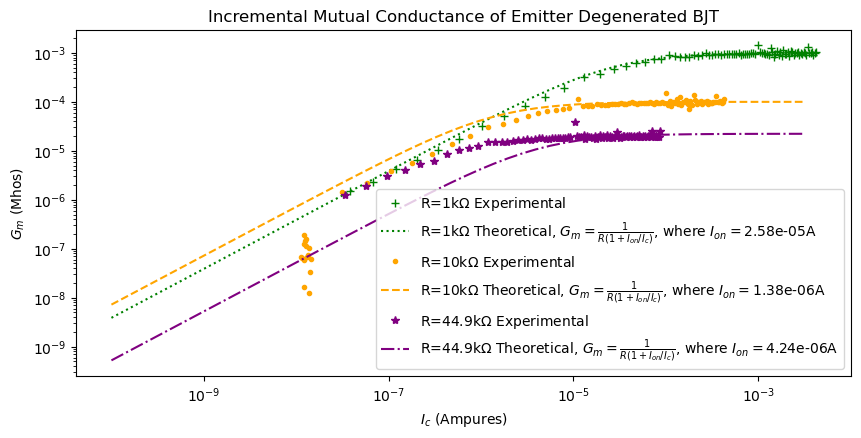

In [16]:
plt.figure(figsize=(10, 4.5))
plt.loglog()

cmap = ["purple", "orange", "green"]
marks = ["*", ".", "+"]
lines = ["-.", "--", ":"]

for r, df in exp2_data.items():
    i_c = np.abs(df["current_collector"])
    v_b = np.abs(df["voltage_base"])

    valid_range = i_c > 1e-8
    i_c = i_c[valid_range]
    v_b = v_b[valid_range]

    color = cmap.pop()
    mark = marks.pop()
    line = lines.pop()

    G_m = np.diff(i_c) / np.diff(v_b)

    res = exp2_res_map[r]
    start = np.min(i_b)
    end = np.max(i_b)

    plt.plot(i_c[:-1], G_m, mark, color=color, label=f"R={r}$\Omega$ Experimental")

    i_c_theoretical = np.logspace(-10, -2.5)

    v_on = v_on_map[r]
    i_on = i_s * np.exp(v_on/u_t)
    G_m_theoretical = 1/res / (1 + i_on / i_c_theoretical)

    plt.plot(i_c_theoretical, G_m_theoretical, line, color=color, label=f"R={r}$\Omega$ Theoretical, " + "$G_m =\\frac{1}{R (1+I_{on}/I_c)}$, where $I_{on}=$" + f"{i_on:0.3}A")


plt.xlabel("$I_c$ (Ampures)")
plt.ylabel("$G_m$ (Mhos)")
plt.title(f"Incremental Mutual Conductance of Emitter Degenerated BJT")

props = dict(boxstyle="round", facecolor="gray", alpha=0.25)

plt.legend()
plt.savefig("exp2-Gm.pdf")
plt.show()
plt.close()
